#steps
importing he libraries
importing dataset
data cleaning,dta manipulation,data visualization,
EDA
splitting the data
choosing he model
training hte model
testing the model
model evaluation
(optional)export the dataset into.csv file

In [3]:
#BALTIMORE IS A CITY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

IMPORTING THE DATASET

In [93]:
df=pd.read_csv('train_salary.csv')

In [94]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


Given a dataset which captures the salary from July 1st, 2013 to June 30th, 2014. It includes only those employees who are employed on June 30, 2014. Predict the salary of Employees working in Baltimore.

In [7]:
df.tail()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12
18980,"Zukowski,Charles J",Waste Water Tech Supv I Pump,A50206,DPW-Water & Waste Water,10/15/1979,$53568.00,$52164.32


In [8]:
df.shape

(18981, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [10]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [95]:
# here ' name' is abnormal,i.e it has left trailing space ,'strip' removes it and want all to be lower case so use this
df.columns=df.columns.str.lower().str.strip()

In [96]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [97]:
df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [98]:
df.isnull().sum()

,0
name,0
jobtitle,0
agencyid,0
agency,0
hiredate,70
annualsalary,0
grosspay,3223


In [99]:
# task: delete the column grosspay
df.drop('grosspay',axis=1,inplace=True)

In [100]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00


In [23]:
df.agencyid

,agencyid
0,W02200
1,A03031
2,A29005
3,A65026
4,A99416
...,...
18976,W02235
18977,W02629
18978,A99416
18979,A99262


In [19]:
df.agencyid.nunique()

1177

In [20]:
#find out repeated agencyid how many times occured
df.agencyid.value_counts()

,count
agencyid,
P04001,316
C90786,276
W02629,193
P04002,191
A99416,166
...,...
W02539,1
A65052,1
W02106,1


In [22]:
df.agency.value_counts()

,count
agency,
Youth Summer,4323
Police Department,3211
Fire Department,1576
DPW-Water & Waste Water,1491
HLTH-Health Department,833
...,...
Council Services,6
HLTH-Health Dept Locatio,6
Legislative Reference,5


In [25]:
#map agencies to their id's
df.agencyid.value_counts().map(df.agency)

,count
agencyid,
P04001,HLTH-Health Department
C90786,Youth Summer
W02629,Police Department
P04002,DPW-Solid Waste
A99416,Youth Summer
...,...
W02539,OED-Employment Dev
A65052,OED-Employment Dev
W02106,OED-Employment Dev


In [101]:
#remove all the $ sign in annual salary column and change the dtype to integer
df.annualsalary.head()

,annualsalary
0,$11310.00
1,$53428.00
2,$68300.00
3,$62000.00
4,$43999.00


In [102]:
df.annualsalary=df.annualsalary.str.replace('$','').astype(float).astype(int)

In [103]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999


In [35]:
df['hiredate'][0][0:2]

'06'

In [39]:
df['hiredate'][0][3:5] #got hire month

'10'

In [40]:
df.drop('hiremonth',axis=1,inplace=True)

In [104]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999


In [106]:
import pandas as pd # Import the pandas library

df['hiredate'] = pd.to_datetime(df['hiredate']) # Convert 'hiredate' column to Timestamp objects

df['hireday'] = [df['hiredate'][i].day for i in range(len(df['hiredate']))] # Extract day
df['hiremonth'] = [df['hiredate'][i].month for i in range(len(df['hiredate']))] # Extract month
df['hireyear'] = [df['hiredate'][i].year for i in range(len(df['hiredate']))] # Extract year

In [107]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,hireday,hiremonth,hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310,10.0,6.0,2013.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428,24.0,10.0,1979.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300,25.0,9.0,2006.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000,23.0,7.0,2009.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999,24.0,7.0,2013.0


In [110]:
 df.hiremonth=df.hiremonth.fillna(0).astype(int)

In [111]:
df.hireday=df.hireday.fillna(0).astype(int)

In [112]:
df.hireyear=df.hireyear.fillna(0).astype(int)

In [113]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,hireday,hiremonth,hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999,24,7,2013


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


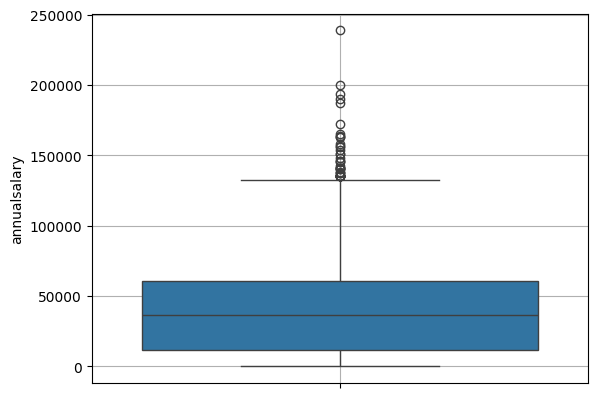

In [115]:
sns.boxplot(df.annualsalary)
plt.grid()

In [ ]:
# task:plot top 10 job titles with highest salary,descending of highest salary top 10


In [116]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,hireday,hiremonth,hireyear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999,24,7,2013


In [142]:
x=np.array(df.drop(['annualsalary','name','jobtitle','agencyid','agency','hiredate'],axis=1)) # Pass column names as a list
y=np.array(df['annualsalary'])

In [143]:
x

array([[  10,    6, 2013],
       [  24,   10, 1979],
       [  25,    9, 2006],
       ...,
       [  17,   12, 2013],
       [  23,    1, 2013],
       [  15,   10, 1979]])

In [144]:
y

array([11310, 53428, 68300, ..., 43999, 44104, 53568])

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [146]:
from sklearn.svm import SVR

In [147]:
model=SVR(kernel='rbf')

In [148]:
model.fit(x_train,y_train)

SVR()

In [149]:
y_pred=model.predict(x_test)

In [150]:
y_pred

array([36297.01294214, 36298.46343903, 36298.0627    , ...,
       36298.68334519, 36296.26054541, 36295.90940403])

In [151]:
y_test

array([30992, 55891, 38195, ..., 55891, 42903, 47475])

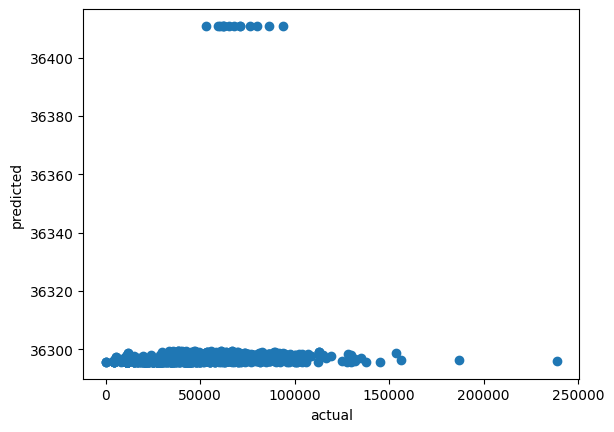

In [162]:
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.grid()


In [163]:
model.score(x_test,y_test)

-0.018729820133873254

In [164]:
r2_score(y_test,y_pred)

-0.018729820133873254

In [168]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,hireday,hiremonth,hireyear,hiredate_ordinal
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,2013-06-10,11310,10,6,2013,735029.0
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,1979-10-24,53428,24,10,1979,722746.0
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,2006-09-25,68300,25,9,2006,732579.0
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,2009-07-23,62000,23,7,2009,733611.0
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,2013-07-24,43999,24,7,2013,735073.0


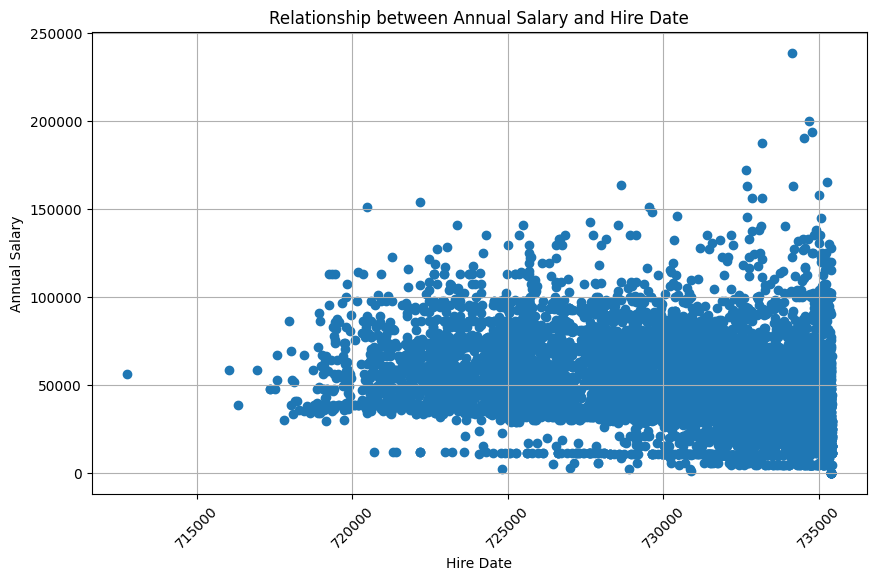

In [177]:
plt.figure(figsize=(10, 6))
plt.scatter(df['hiredate_ordinal'], df['annualsalary'])
# plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)], color='red')

plt.xlabel('Hire Date')
plt.ylabel('Annual Salary')
plt.title('Relationship between Annual Salary and Hire Date')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [169]:
df['hiredate_ordinal'] = df['hiredate'].apply(lambda x: x.toordinal() if pd.notnull(x) else None)
# hiredate_ordinal is a new column in the dataframe that contains the ordinal representation of the hiredate column.

# This means that each date in hiredate is converted to an integer representing the number of days that have passed since day 1 in the Gregorian calendar.

# This is done to make it easier to work with dates in machine learning models, as many models cannot work with dates directly.



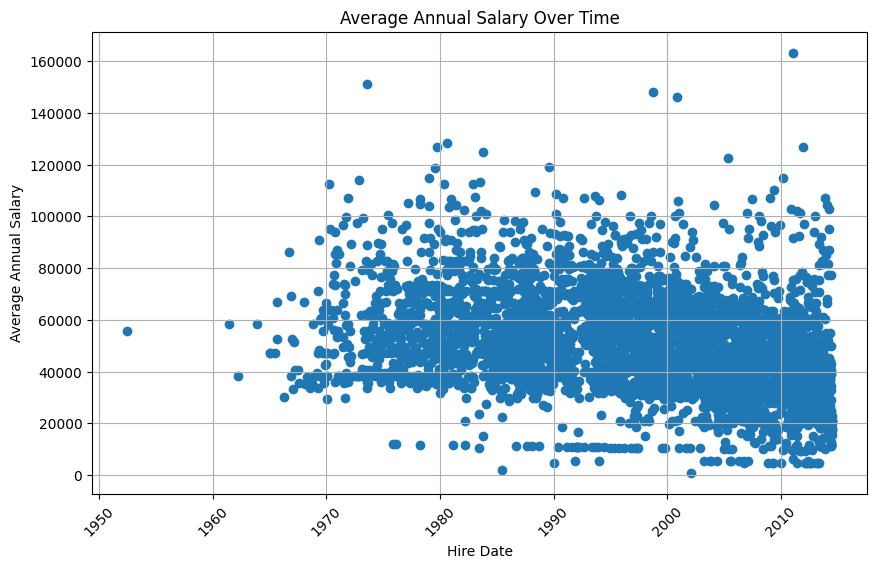

In [179]:
# Group data by hire date and calculate average salary
avg_salary = df.groupby('hiredate')['annualsalary'].mean()

# Create a line plot of average salary over time
plt.figure(figsize=(10, 6))
plt.scatter(avg_salary.index, avg_salary.values)
plt.xlabel('Hire Date')
plt.ylabel('Average Annual Salary')
plt.title('Average Annual Salary Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()